# Buffon's Needle Problem_ Eunchan Lee

## 원주율 계산

In [12]:
############################################################
#### 2024.09.30. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
############################################################


import numpy as np
from tqdm import tqdm

def buffon_needle_simulation(n, k):
    d = 1.0  # 평행선 간격을 1로 설정
    l = k * d  # 바늘 길이 = 비율 * 1
    count = 0  # 교차한 바늘 수

    # n개의 바늘 중점과 각도를 랜덤하게 생성
    mid_points = np.random.rand(n)+1  # 0~1 사이 랜덤한 중점 생성
    angles = np.random.rand(n) * 2 * np.pi  # 0~2π 사이의 랜덤한 각도 생성

    for i in tqdm(range(n)):
        y0 = mid_points[i]  # 바늘 중점
        theta = angles[i]  # 바늘의 각도

        # 바늘의 양 끝점 계산
        y1 = y0 + (l / 2) * np.sin(theta)
        y2 = y0 - (l / 2) * np.sin(theta)

        # 끝점들이 서로 다른 평행선 위에 있는지 확인 (정수 부분으로 평행선 구분)
        if int(y1) != int(y2):
            count += 1  # 교차한 경우 count 증가

    # 확률 계산
    P = count / n  # 교차한 바늘의 비율
    pi_estimate = (2 * l) / (P * d) if P != 0 else float('inf')  # 원주율 추정값 계산

    
    # 결과 출력
    print(f"바늘이 평행선과 교차한 횟수: {count}")
    print(f"총 바늘 개수: {n}")
    print(f"원주율의 추정값: {pi_estimate}")

# 바늘 개수, 바늘과 평행선 간격 비율 입력
n = int(input("생성할 바늘의 개수 n을 입력하세요: "))
k = float(input("바늘과 평행선 간격의 비율 k를 입력하세요 [0, 1]: "))

# 시뮬레이션 실행
buffon_needle_simulation(n, k)

생성할 바늘의 개수 n을 입력하세요: 1000000
바늘과 평행선 간격의 비율 k를 입력하세요 [0, 1]: 1


100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:04<00:00, 204503.35it/s]

바늘이 평행선과 교차한 횟수: 636163
총 바늘 개수: 1000000
원주율의 추정값: 3.1438483533308283


## n 수에 따른 정확도 및 오차

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:32<00:00,  5.50s/it]


n=100, 추정된 원주율: 3.5087719298245617, 오차: 0.36717927623476854
n=1000, 추정된 원주율: 3.284072249589491, 오차: 0.14247959599969784
n=10000, 추정된 원주율: 3.1746031746031744, 오차: 0.03301052101338131
n=100000, 추정된 원주율: 3.153927428129879, 오차: 0.012334774540085913
n=1000000, 추정된 원주율: 3.138997969068314, 오차: 0.0025946845214792624
n=10000000, 추정된 원주율: 3.141781531508534, 오차: 0.00018887791874089288


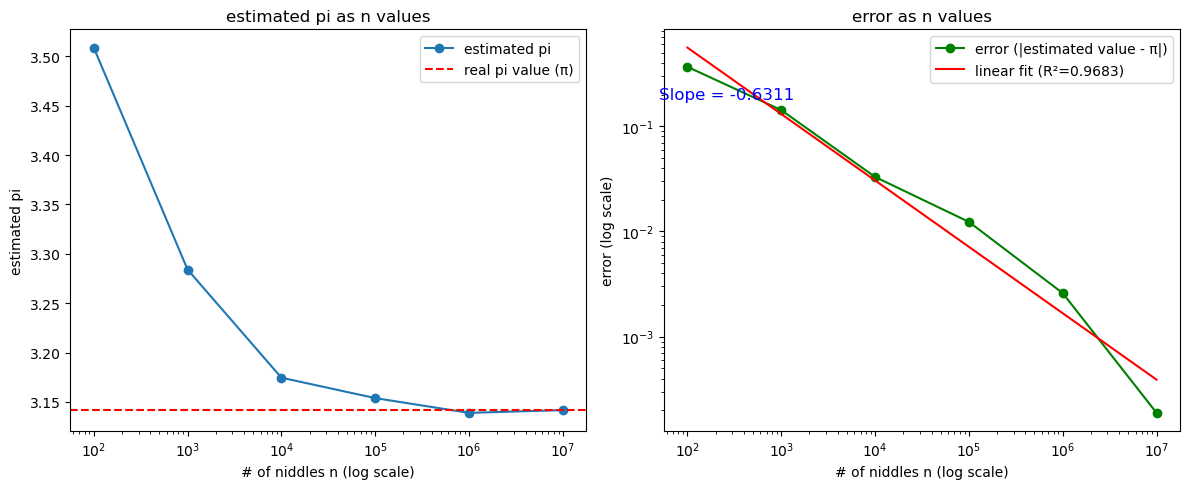

In [3]:
############################################################
#### 2024.09.30. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
############################################################



import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def buffon_needle_simulation(n, k):
    d = 1.0  # 평행선 간격을 1로 설정
    l = k * d  # 바늘 길이 = 비율 * 1
    count = 0  # 교차한 바늘 수

    # n개의 바늘 중점과 각도를 랜덤하게 생성
    mid_points = np.random.rand(n) + 1  # 0~1 사이 랜덤한 중점 생성
    angles = np.random.rand(n) * 2 * np.pi  # 0~2π 사이의 랜덤한 각도 생성

    for i in range(n):
        y0 = mid_points[i]  # 바늘 중점
        theta = angles[i]  # 바늘의 각도

        # 바늘의 양 끝점 계산
        y1 = y0 + (l / 2) * np.sin(theta)
        y2 = y0 - (l / 2) * np.sin(theta)

        # 끝점들이 서로 다른 평행선 위에 있는지 확인 (정수 부분으로 평행선 구분)
        if int(y1) != int(y2):
            count += 1  # 교차한 경우 count 증가

    # 확률 계산
    P = count / n  # 교차한 바늘의 비율
    pi_estimate = (2 * l) / (P * d) if P != 0 else float('inf')  # 원주율 추정값 계산

    return pi_estimate

# 시뮬레이션 설정
k = 1.0  # 바늘 길이와 평행선 간격의 비율
n_values = [100 * (10 ** i) for i in range(6)] # 10000부터 10배씩 증가하는 n 값들
pi_actual = np.pi  # 실제 원주율

# 결과 저장 리스트
pi_estimates = []
errors = []

# 시뮬레이션 실행
for n in tqdm(n_values):
    pi_estimate = buffon_needle_simulation(n, k)
    error = abs(pi_estimate - pi_actual)  # 실제 pi와 추정된 pi 사이의 오차

    pi_estimates.append(pi_estimate)
    errors.append(error)

# 결과 출력
for i, n in enumerate(n_values):
    print(f"n={n}, 추정된 원주율: {pi_estimates[i]}, 오차: {errors[i]}")

# 피팅 결과 시각화
plt.figure(figsize=(12, 5))

# 추정된 원주율 그래프
plt.subplot(1, 2, 1)
plt.plot(n_values, pi_estimates, marker='o', label="estimated pi")
plt.axhline(y=np.pi, color='r', linestyle='--', label="real pi value (π)")
plt.xscale('log')  # 로그 스케일로 변경
plt.xlabel("# of niddles n (log scale)")
plt.ylabel("estimated pi")
plt.title("estimated pi as n values")
plt.legend()

# 추세선 생성
coeffs = np.polyfit(np.log10(n_values), np.log10(errors), 1) # 1차함수의 계수
trendline = np.polyval(coeffs, np.log10(n_values)) # 1차함수 만들기

# Residual 계산
residuals = np.log10(errors) - trendline
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log10(errors) - np.mean(np.log10(errors)))**2)
r2 = 1 - (ss_res / ss_tot)

# 오차 그래프
plt.subplot(1, 2, 2)
plt.plot(n_values, errors, marker='o', color='g', label="error (|estimated value - π|)")
plt.plot(n_values, 10**trendline, 'r-', label=f"linear fit (R²={r2:.4f})")
plt.xscale('log')  # 로그 스케일로 변경
plt.yscale('log')  # 로그 스케일로 변경
plt.xlabel("# of niddles n (log scale)")
plt.ylabel("error (log scale)")
plt.title("error as n values")
plt.legend()

# 추세선의 기울기 표시
slope = coeffs[0]  # 추세선의 기울기
plt.text(
    x=0.5 * n_values[0],  # x 위치 (적당한 위치로 조정)
    y=0.5 * errors[0],    # y 위치 (적당한 위치로 조정)
    s=f"Slope = {slope:.4f}",  # 기울기 값 출력
    color="blue",
    fontsize=12
)

plt.tight_layout()
# 이미지 파일로 저장 (경로 지정 가능)
plt.savefig(r"C:\Supernova\#4_GIST\SeJunior\2nd Semester\과학계산 프로그래밍\Hw_SC\HW_PI_errors_001.jpg", format='jpg', dpi=300)

plt.show()
